# The Sparks Foundation

# problem statement - predict the percentage of student based on the number of study hours what will be the predicted score if a student studies for 9.25 hours/day 

# Simple Linear Regression 

Author - Vaibhav Banait

In these regression task we will predict the percentage of marks that a student is expected to score based upon the
number of hours they studied.These is a simple linear regression task as it involves just two variables

In [50]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [51]:
#read the file
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Both the variables are Numerical in the dataset

In [53]:
df.shape

(25, 2)

In [54]:
#checking null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in the dataset

In [55]:
#Discriptive summary of the Dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Exploratory Data Analysis

In [56]:
#check for outliers
df.boxplot

<bound method boxplot_frame of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

<AxesSubplot:>

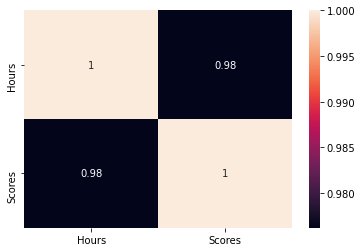

In [57]:
#check for auto-correlation
#visualization using heatmap
sns.heatmap(df.corr(),annot=True)

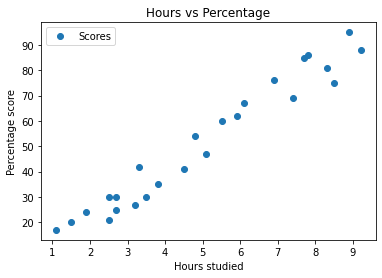

In [58]:
#plotting the distribution of scores
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

From the graph we can assume that there is positive collinear relation between these two variables so as number of
study increases the percentage of score is also increases

# Model Building

In [59]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [60]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

In [61]:
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)

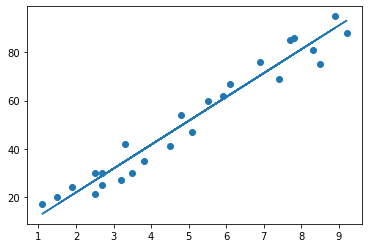

In [62]:
#Plotting the regression line
line = lr_model.coef_*X+lr_model.intercept_

#Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions

In [63]:
#We have trained our model and now its time to do predictions

In [64]:
print(X_test)
y_pred = lr_model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [65]:
# Comparing Actual vs Predicted
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_new 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [68]:
# we can also test with your own data
hours = 9.25
pred = lr_model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model

In [69]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


From the above model we can predict that if the no of study hours is 9.25 the percentage score will be 93.69